In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive/',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
path = '/content/gdrive/My Drive/covid-19_italy/'

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random

In [0]:
%tensorflow_version 2.x
import tensorflow as tf


In [0]:
os.listdir(path)

['covid19_italy_province.csv',
 'covid19_italy_region.csv',
 'covid19_italy_region.csvrl_model.h5',
 'covid19_italy_region.csvrl_model_1.h5',
 'covid19_italy_region.csvrl_model_lstm1.h5',
 'covid19_italy_region.csvrl_model_lstm_FINAL.h5']

In [0]:
path+='covid19_italy_region.csv'


In [0]:
df = pd.read_csv(path)
df.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN


In [0]:
df.drop('TestsPerformed',axis=1,inplace=True)

In [0]:
df['RegionCode'].iloc[np.where(df['RegionName'].values=='P.A. Bolzano')]

2       4
23      4
44      4
65      4
86      4
       ..
1262    4
1283    4
1304    4
1325    4
1346    4
Name: RegionCode, Length: 65, dtype: int64

In [0]:
df['RegionCode'].iloc[np.where(df['RegionName'].values=='P.A. Trento')]

17      4
38      4
59      4
80      4
101     4
       ..
1277    4
1298    4
1319    4
1340    4
1361    4
Name: RegionCode, Length: 65, dtype: int64

In [0]:
df['RegionCode'].iloc[np.where(df['RegionName'].values=='P.A. Trento')]=21    

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
regions = {i[1]:[i[0]] for i in (df[['RegionName','RegionCode']].values)[:21,:]}
  

In [0]:
reg_pop = [4356406,125666,10060574,1072276,4905854,1215220,1550640,4459477,3729641,882015,1525271,5879082,1311580,305617,5801692,4029053,562869,1947131,4999891,163591,1072276]

In [0]:
TOTAL_POP = sum(reg_pop)
print('total population: ',TOTAL_POP)

total population:  59955822


In [0]:
for i,_ in enumerate(regions.items()):
  temp = regions[i+1]
  # print(temp)
  # print(reg_pop[i])
  temp.append(reg_pop[i])
  # print(temp)
  
  

In [0]:
regions

{1: ['Piemonte', 4356406],
 2: ["Valle d'Aosta", 125666],
 3: ['Lombardia', 10060574],
 4: ['P.A. Bolzano', 1072276],
 5: ['Veneto', 4905854],
 6: ['Friuli Venezia Giulia', 1215220],
 7: ['Liguria', 1550640],
 8: ['Emilia-Romagna', 4459477],
 9: ['Toscana', 3729641],
 10: ['Umbria', 882015],
 11: ['Marche', 1525271],
 12: ['Lazio', 5879082],
 13: ['Abruzzo', 1311580],
 14: ['Molise', 305617],
 15: ['Campania', 5801692],
 16: ['Puglia', 4029053],
 17: ['Basilicata', 562869],
 18: ['Calabria', 1947131],
 19: ['Sicilia', 4999891],
 20: ['Sardegna', 163591],
 21: ['P.A. Trento', 1072276]}

In [0]:
df.drop(['RegionName','Latitude','Longitude','Country'],axis=1,inplace=True)

In [0]:
df.head()

,SNo,Date,RegionCode,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases
0,0,2020-02-24T18:00:00,13,0,0,0,0,0,0,0,0,0
1,1,2020-02-24T18:00:00,17,0,0,0,0,0,0,0,0,0
2,2,2020-02-24T18:00:00,4,0,0,0,0,0,0,0,0,0
3,3,2020-02-24T18:00:00,18,0,0,0,0,0,0,0,0,0
4,4,2020-02-24T18:00:00,15,0,0,0,0,0,0,0,0,0


In [0]:
df['IntensiveCarePatients'].iloc[np.where(df['IntensiveCarePatients'].values!=0)[0]]

5         2
7         1
9        19
20        4
26        2
       ... 
1360    144
1361     22
1362     17
1363      5
1364    120
Name: IntensiveCarePatients, Length: 1151, dtype: int64

In [0]:
p = df.groupby('Date')

In [0]:
p.groups.keys()

dict_keys(['2020-02-24T18:00:00', '2020-02-25T18:00:00', '2020-02-26T18:00:00', '2020-02-27T18:00:00', '2020-02-28T18:00:00', '2020-02-29T17:00:00', '2020-03-01T17:00:00', '2020-03-02T18:00:00', '2020-03-03T18:00:00', '2020-03-04T17:00:00', '2020-03-05T17:00:00', '2020-03-06T17:00:00', '2020-03-07T18:00:00', '2020-03-08T18:00:00', '2020-03-09T18:00:00', '2020-03-10T18:00:00', '2020-03-11T17:00:00', '2020-03-12T17:00:00', '2020-03-13T17:00:00', '2020-03-14T17:00:00', '2020-03-15T17:00:00', '2020-03-16T17:00:00', '2020-03-17T17:00:00', '2020-03-18T17:00:00', '2020-03-19T17:00:00', '2020-03-20T17:00:00', '2020-03-21T17:00:00', '2020-03-22T17:00:00', '2020-03-23T17:00:00', '2020-03-24T17:00:00', '2020-03-25T17:00:00', '2020-03-26T17:00:00', '2020-03-27T17:00:00', '2020-03-28T17:00:00', '2020-03-29T17:00:00', '2020-03-30T17:00:00', '2020-03-31T17:00:00', '2020-04-01T17:00:00', '2020-04-02T17:00:00', '2020-04-03T17:00:00', '2020-04-04T17:00:00', '2020-04-05T17:00:00', '2020-04-06T17:00:00', 

In [0]:
p.get_group('2020-03-05T17:00:00').head()

,SNo,Date,RegionCode,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases
210,210,2020-03-05T17:00:00,13,8,0,8,0,8,1,0,0,8
211,211,2020-03-05T17:00:00,17,0,0,0,1,1,0,0,0,1
212,212,2020-03-05T17:00:00,4,1,0,1,0,1,0,0,0,1
213,213,2020-03-05T17:00:00,18,1,0,1,1,2,1,0,0,2
214,214,2020-03-05T17:00:00,15,12,0,12,33,45,14,0,0,45


In [0]:
var = p.get_group('2020-03-05T17:00:00')['CurrentPositiveCases'].values + p.get_group('2020-03-05T17:00:00')['NewPositiveCases'].values

In [0]:
p.get_group('2020-03-05T17:00:00')['NewPositiveCases'].values,p.get_group('2020-03-05T17:00:00')['CurrentPositiveCases'].values

(array([  1,   0,   0,   1,  14, 154,   3,  14,   2, 431,  40,   4,  26,
          5,   0,   0,  23,   2,   0,   2,  47]),
 array([   8,    1,    1,    2,   45,  658,   21,   41,   21, 1777,  120,
           7,  106,   12,    2,   16,   60,    7,    9,    2,  380]))

In [0]:
POPULATIONS = np.array([regions[i][1] for i in p.get_group('2020-03-05T17:00:00')['RegionCode'].values])  

In [0]:
np.append(var[:,None],POPULATIONS[:,None],axis=1)

array([[       9,  1311580],
       [       1,   562869],
       [       1,  1072276],
       [       3,  1947131],
       [      59,  5801692],
       [     812,  4459477],
       [      24,  1215220],
       [      55,  5879082],
       [      23,  1550640],
       [    2208, 10060574],
       [     160,  1525271],
       [      11,   305617],
       [     132,  4356406],
       [      17,  4029053],
       [       2,   163591],
       [      16,  4999891],
       [      83,  3729641],
       [       9,  1072276],
       [       9,   882015],
       [       4,   125666],
       [     427,  4905854]])

In [0]:
def scaling(pop_sus,pop_inf):
         value = 6000/(pop_sus+pop_inf)
         ttemp = int(value*pop_inf)
         if(ttemp==0):
           ttemp = 1
         return 6000,ttemp

In [0]:
 def plotter(data):
   #plt.figure(figsize=(10,10))
   fig,ax = plt.subplots(3,7,figsize=(50,50))
   ind1 = 0
   ind2 = 0
   for i in data:
       ax[ind1][ind2].plot(i[0],i[1],'bo',i[2],i[3],'ro')
       ind2+=1
       if(ind2==7):
         ind2 = 0
         ind1+=1
   plt.show()     


#     plt.figure(figsize=(10,10))
#     plt.plot(p,q,'bo',r,s,'ro')
#     plt.show()
   
    
    

In [0]:
def position(pop_sus,pop_inf):
         position_x = []
         position_y = []
         position_inf_x = []
         position_inf_y = []
         random.seed(101)
         _,ttemp = scaling(pop_sus,pop_inf)
         for i in range(6000):
           x_i = round(random.uniform(100,12000),2)
           y_i = round(random.uniform(100,12000),2)
           position_x.append(x_i)
           position_y.append(y_i)
         for i in range(ttemp): 
             x_i = round(random.uniform(6000,8000),2)
             y_i = round(random.uniform(6000,8000),2)
             position_inf_x.append(x_i)
             position_inf_y.append(y_i)
         return np.asarray(position_x),np.asarray(position_y),np.asarray(position_inf_x),np.asarray(position_inf_y)

In [0]:
pop_sus = POPULATIONS[p.get_group('2020-04-24T17:00:00')['RegionCode'].values-1]
pop_inf = p.get_group('2020-04-24T17:00:00')['NewPositiveCases'].values + p.get_group('2020-04-24T17:00:00')['CurrentPositiveCases'].values

In [0]:
dictonary = []
for i in range(len(pop_sus)):
  dictonary.append(position(pop_sus[i],pop_inf[i]) )
  

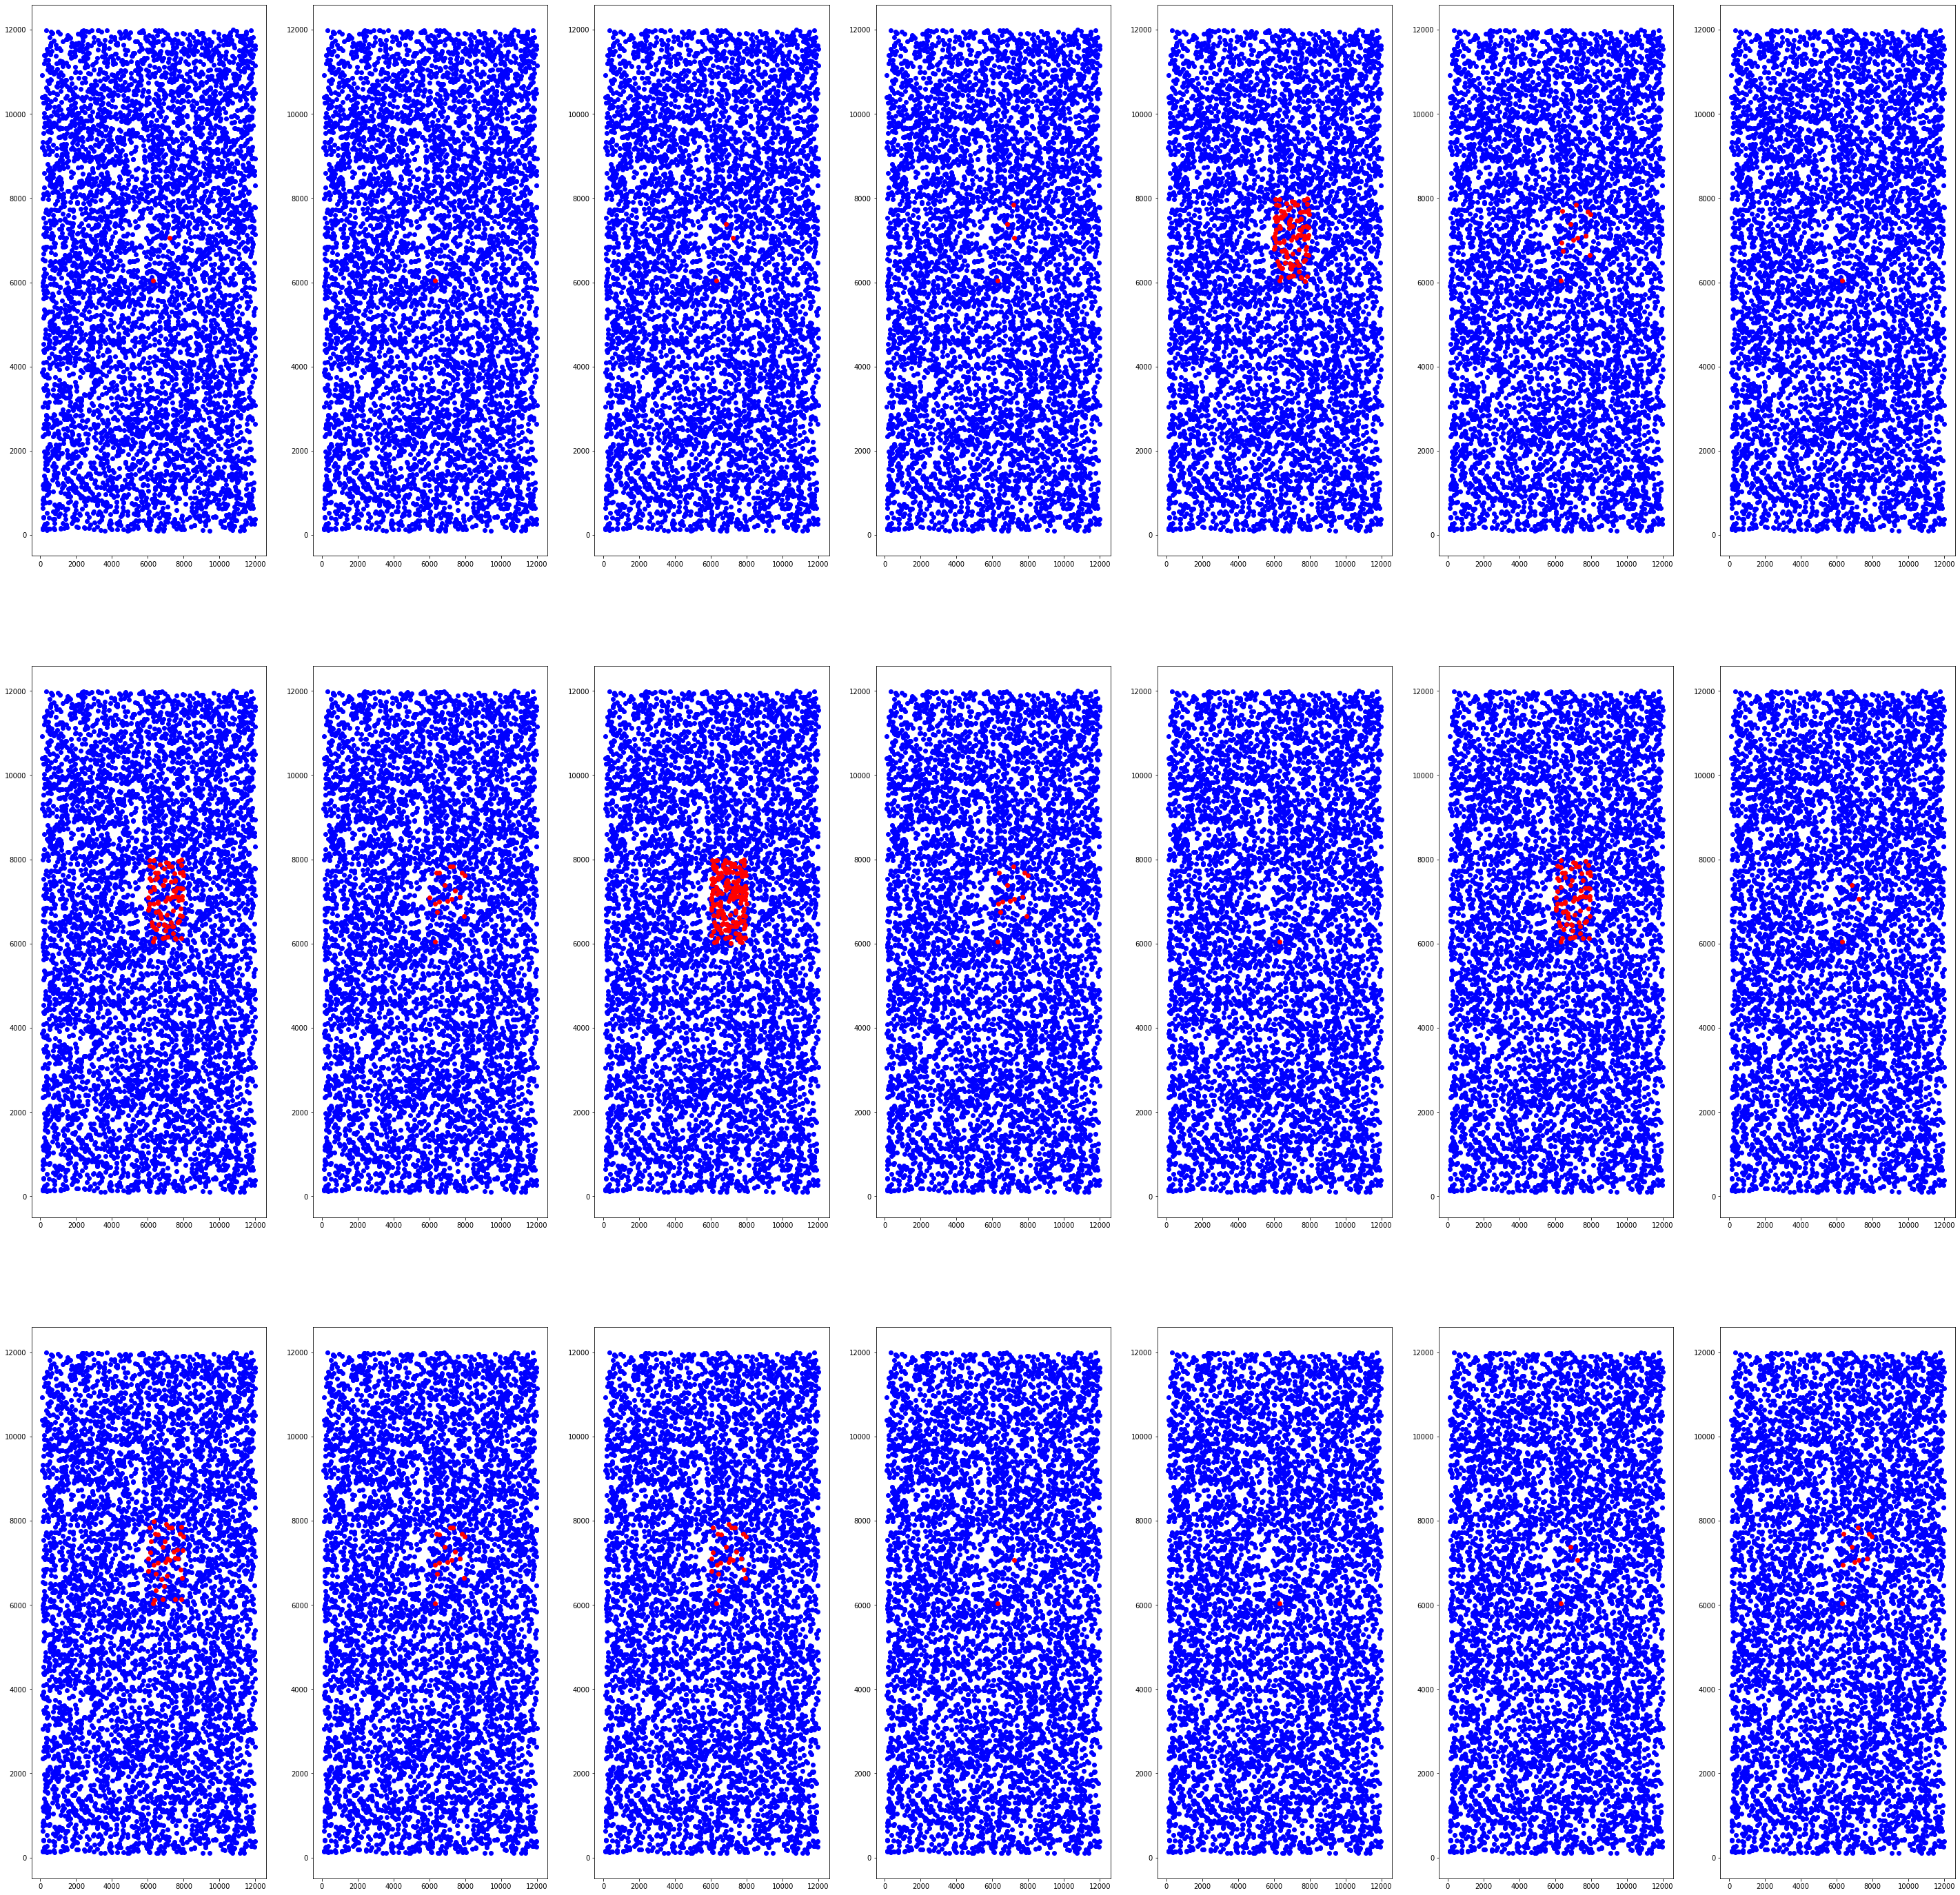

In [0]:
plotter(dictonary)

In [0]:
# len(position_x),len(position_inf_x)

In [0]:
# position_x[623],position_y[623],position_inf_x[0],position_inf_y[0]

In [0]:
# position_x,position_y = np.asarray(position_x),np.asarray(position_y)
# position_inf_x,position_inf_y = np.asarray(position_inf_x),np.asarray(position_inf_y)

In [0]:
# def random_walk(x,y,lockdown=False):
#      if(lockdown == True):
#        travel_radius = round(random.uniform(0,3),2)
#      else:
#        travel_radius = round(random.uniform(0,15),2)  
#      val = random.randint(0, 8) 
#      if val == 0:
#        return x,y
#      if val == 1: 
#         return x+travel_radius,y
#      if val == 2: 
#         return x-travel_radius,y    
#      if val == 3: 
#         return x,y+travel_radius
#      if val == 4:   
#        return x,y-travel_radius
#      if val == 5:
#        return x+travel_radius,y+travel_radius
#      if val == 6:
#        return x+travel_radius,y-travel_radius
#      if val == 7:
#        return x-travel_radius,y+travel_radius
  
#      return x-travel_radius,y-travel_radius
       


In [0]:
# def check_beta(beta):
#   #print('Beta:',beta)
#   if 0<=beta<=0.5:
#     return 6
#   if 0.5<beta<=1:
#     return 5
#   if 1<beta<=1.5:
#     return 4
#   if 1.5<beta<=2:
#     return 3
#   if 2<beta<=2.5:
#     return 2
#   if 2.5<beta<=3:
#     return 1
#   return 0  
     
     
         


In [0]:
# lockdown = True
# get_infected = 0
# if(lockdown):
#   get_infected = 0.4
# else:
#   get_infected = 0.8  

In [0]:
# j=1
# threshold = 0.1 * len(position_x)
# storage = np.zeros(80)
# rewards = np.zeros(80)
# infected_count = np.zeros(80)
# N = 6000 + len(position_inf_x)
# while(j<=80):
#   incubation = []
#   if(len(position_x) <= threshold):
#     k = j-1
#     while(k<80):
#       storage[k] = storage[k-1]-random.randint(1,10)
#       infected_count[k] = infected_count[k-1]+random.randint(1,10)-random.randint(0,2)
#       beta = N * (storage[k-1]-storage[k])/(storage[k]*infected_count[k])
#       rewards[k] = check_beta(beta)
#       k+=1
#     break
#   if len(position_inf_x)==0:
#     k = j-1
#     while(k<80):
#       storage[k] = storage[k-1]
#       infected_count[k] = infected_count[k-1]-random.randint(0,2)
#       beta = 0
#       #print(beta,k,j)
#       rewards[k] = check_beta(beta)
#       k+=1
#     break  

#   for i in range(len(position_x)):
#     inf_index = random.randint(0,len(position_inf_x)-1)
#     pos3,pos4 = random_walk(position_inf_x[inf_index],position_inf_y[inf_index])
#     if(lockdown == True and round(random.uniform(0,1),2)<=0.65):
#             for k in range(50):
#               pos1,pos2 = random_walk(position_x[i],position_y[i],True)
#               if np.where(np.abs(position_x-pos1)<=0.8)[0].size>0 or np.where(np.abs(position_y-pos2)<=0.8)[0].size>0:
#                 continue
#               else:
#                 position_x[i] = pos1
#                 position_y[i] = pos2
#                 break
              
#     else:
#       position_x[i],position_y[i] = random_walk(position_x[i],position_y[i])
#     position_inf_x[inf_index] = pos3
#     position_inf_y[inf_index] = pos4
    
#     if np.where(np.abs(position_inf_x-position_x[i])<=1)[0].size>0 or np.where(np.abs(position_inf_y-position_y[i])<=1)[0].size>0 and round(random.uniform(0,1),2)<=get_infected:
#                 #print('i am infected')
#                 incubation.append(i)
  
#   if(j==1):
#     infected_count[j-1]=(len(position_inf_x)+len(incubation))
#   else:
#     infected_count[j-1]=(infected_count[j-2]+len(incubation))
#   infected_count[j-1]-=random.randint(0,2)    
#   for m in incubation:
#     #print(k,position_x[k])
#     position_inf_x = np.append(position_inf_x,position_x[m])
#     position_inf_y = np.append(position_inf_y,position_y[m])
#   position_x = np.delete(position_x,incubation)
#   position_y = np.delete(position_y,incubation)
#   quarantined = []
#   for m in range(len(position_inf_x)):
#     if round(random.random(),2)<=0.45 and j>4:
#       quarantined.append(m)
#   if(len(quarantined)>0):    
#       position_inf_x = np.delete(position_inf_x,quarantined)
#       position_inf_y = np.delete(position_inf_y,quarantined)    
#   #print(len(position_x),len(position_y),len(position_inf_x),len(position_inf_y))
#   storage[j-1]=(len(position_x))
  
#   if(j==1):
#     beta = N*(6000-storage[j-1])/(storage[j-1]*len(position_inf_x))
#   else:
#     if(len(position_inf_x)>0):
#       beta = N*(storage[j-2]-storage[j-1])/(storage[j-1]*len(position_inf_x))
#     else:
#       beta = 0 
#   rewards[j-1] = check_beta(beta)
#   plotter(position_x,position_y,position_inf_x,position_inf_y)           
#   j+=1  


In [0]:
# plt.figure(figsize=(10,10))
# plt.plot(position_x,position_y,'bo',position_inf_x,position_inf_y,'ro')

In [0]:
# len(position_x),len(position_inf_x)

In [0]:
# rewards

In [0]:
# infected_count

In [0]:
# plt.ylim((0.1 *6000,6000))
# plt.plot(np.arange(1,81),infected_count,'r-',np.arange(1,81),storage)

In [0]:
np.array([np.array([5,4,6]),np.array([5,4,6])]+[np.array([1,2,3]),np.array([1,2,3]),np.array([1,2,3])]).shape

(5, 3)

In [0]:
def demo(x=None):
  while True:
    x = yield
    if(x==True):
      yield "hello"
    else:
      yield "No"
  print('what the hell')  

In [0]:
def create():
  tt = random.uniform(0,1)
  if tt >=0.5:
    return True
  return False  

In [0]:
gen = demo()
for i in range(0,10):
    try:
      next(gen)
      print(gen.send(create()))
    except StopIteration:
      print('finished') 
  



No
No
hello
No
No
No
hello
hello
No
hello


In [0]:
class epidemic():
  def __init__(self,dates,effectiveness=0.65,get_quarantined=0.45,infect_radius=1,social_dist_val=0.8,get_infected = 0.40):
    self.dates = dates
    self.effectiveness = effectiveness 
    self.get_infected = get_infected
   
    self.get_quarantined = get_quarantined 
    self.infect_radius = infect_radius
    
    self.social_dist_val = social_dist_val
    
    #self.incubation = 2
  def reset(self):
    #self.tpop = TOTAL_POP
    self.date = random.randint(0,len(self.dates)-1)
    self.df = p.get_group(self.dates[self.date])
    self.pop = np.array([regions[i][1] for i in self.df['RegionCode'].values]) 
    return self.nextobservation()  

  def nextobservation(self):
    #infected = self.df['CurrentPositiveCases'].values + self.df['NewPositiveCases'].values
    #susceptible = self.pop-infected-self.df['Recovered'].values-self.df['Deaths'].values
    #for i in range(len(infected)):
     # _,infected[i] = self.scaling(susceptible[i],infected[i])
      #susceptible[i] = 6000
    infected = sum(self.df['CurrentPositiveCases'].values + self.df['NewPositiveCases'].values)
    susceptible = sum(self.pop-infected-self.df['Recovered'].values-self.df['Deaths'].values)
    susceptible,infected = self.scaling(susceptible,infected)
    #return np.append(infected[:,None],susceptible[:,None],axis=1)
    return np.append(np.array([susceptible])[:,None],np.array([infected])[:,None],axis=1)

  
  def scaling(self,pop_sus,pop_inf):
         value = 6000/(pop_sus+pop_inf)
         ttemp = int(value*pop_inf)
         if(ttemp==0):
           ttemp = 1
         return 6000,ttemp  

  
  def randomwalk(self,x,y,lockdown=False):
      if(lockdown == True):
        travel_radius = random.randint(0,3)
      else:
        travel_radius = random.randint(0,15)  
      val = random.randint(0, 8) 
      if val == 0:
        return x,y
      if val == 1: 
         return x+travel_radius,y
      if val == 2: 
         return x-travel_radius,y    
      if val == 3: 
         return x,y+travel_radius
      if val == 4:   
        return x,y-travel_radius
      if val == 5:
        return x+travel_radius,y+travel_radius
      if val == 6:
        return x+travel_radius,y-travel_radius
      if val == 7:
        return x-travel_radius,y+travel_radius
   
      return x-travel_radius,y-travel_radius
        

       
  def checklockdown(self,value_day,lockdown_day):
    #if(value_day<=lockdown_day):
    if(lockdown_day):
      return True
    return False  


  def position(self,pop_sus,pop_inf):
         position_x = []
         position_y = []
         position_inf_x = []
         position_inf_y = []
         random.seed(101)
         _,ttemp = self.scaling(pop_sus,pop_inf)
         for i in range(6000):
           x_i = round(random.uniform(100,12000),2)
           y_i = round(random.uniform(100,12000),2)
           position_x.append(x_i)
           position_y.append(y_i)
         for i in range(ttemp): 
             x_i = round(random.uniform(6000,8000),2)
             y_i = round(random.uniform(6000,8000),2)
             position_inf_x.append(x_i)
             position_inf_y.append(y_i)
         return np.asarray(position_x),np.asarray(position_y),np.asarray(position_inf_x),np.asarray(position_inf_y)   

  
  def checkbeta(self,beta,pop_temp):
         pop_temp = pop_temp/6000
         if 0<=beta<=0.5:
           return 6*pop_temp
         if 0.5<beta<=1:
           return 5*pop_temp
         if 1<beta<=1.5:
           return 4*pop_temp
         if 1.5<beta<=2:
           return 3*pop_temp
         if 2<beta<=2.5:
           return 2*pop_temp
         if 2.5<beta<=3:
           return 1*pop_temp
         return 0*pop_temp  
     
     
  def plotter(self,position_x,position_y,position_inf_x,position_inf_y):
    plt.figure(figsize=(10,10))
    plt.plot(position_x,position_y,'bo',position_inf_x,position_inf_y,'ro')
    plt.show()
    plt.close()

  
  

  
  def getinfected(self,act,day):
    #if(day<=act):
    if(act):
      return self.get_infected
    return 2*self.get_infected


  def simulate(self,act=None):
    # region_infected = self.df['CurrentPositiveCases'].values + self.df['NewPositiveCases'].values
    # region_susceptible = self.pop-self.df['Recovered'].values-self.df['Deaths'].values-region_infected
    region_infected = sum(self.df['CurrentPositiveCases'].values + self.df['NewPositiveCases'].values)
    region_susceptible = sum(self.pop-self.df['Recovered'].values-self.df['Deaths'].values-region_infected)
    position_x,position_y,position_inf_x,position_inf_y = self.position(region_susceptible,region_infected) 
    days=1
    threshold = 0.2 * len(position_x)
    rewards = np.zeros(80)
    storage = np.zeros(80)
    infected_count = np.zeros(80)
    N = 6000+len(position_inf_x)
    done = False
    for days in range(1,81):
        incubation = []
        act = yield
        if(len(position_x) <= threshold):
          k = days-1
          while(k<80):
            values = random.randint(0,10)
            infected_count[k] = infected_count[k-1]+values-random.randint(0,1)
            storage[k] = storage[k-1]-values
            beta = 3.1
            rewards[k] = self.checkbeta(beta,storage[k])
            k+=1
          done = True  
          yield np.append(storage[days-1:][:,None],infected_count[days-1:][:,None],axis=1),rewards[days-1:],done
          break

          
        if len(position_inf_x)==0:
          k = days-1
          while(k<80):
            values = random.randint(0,10)
            storage[k] = storage[k-1]+values
            beta = 0
            rewards[k] = self.checkbeta(beta,storage[k])
            k+=1
          done = True  
          yield np.append(storage[days-1:][:,None],infected_count[days-1:][:,None],axis=1),rewards[days-1:],done 
          break 

        for i in range(len(position_x)):
          inf_index = random.randint(0,len(position_inf_x)-1)
          pos3,pos4 = self.randomwalk(position_inf_x[inf_index],position_inf_y[inf_index])
          if(self.checklockdown(days,act) == True and round(random.uniform(0,1),2)<=self.effectiveness):
                  for k in range(20):
                    pos1,pos2 = self.randomwalk(position_x[i],position_y[i],True)
                    if np.where(np.abs(position_x-pos1)<=self.social_dist_val)[0].size>0 or np.where(np.abs(position_y-pos2)<=self.social_dist_val)[0].size>0:
                      continue
                    else:
                      position_x[i] = pos1
                      position_y[i] = pos2
                      break
                    
          else:
            position_x[i],position_y[i] = self.randomwalk(position_x[i],position_y[i])
          position_inf_x[inf_index] = pos3
          position_inf_y[inf_index] = pos4
          
          if np.where(np.abs(position_inf_x-position_x[i])<=self.infect_radius)[0].size>0 or np.where(np.abs(position_inf_y-position_y[i])<=self.infect_radius)[0].size>0 and round(random.uniform(0,1),2)<=self.getinfected(act,days):
                      #print('i am infected')
                      incubation.append(i)
        for m in incubation:
          position_inf_x = np.append(position_inf_x,position_x[m])
          position_inf_y = np.append(position_inf_y,position_y[m])
        position_x = np.delete(position_x,incubation)
        position_y = np.delete(position_y,incubation)
        quarantined = []
        for m in range(len(position_inf_x)):
          if round(random.uniform(0,1),2)<=self.get_quarantined and days>4:
            quarantined.append(m)
        if(len(quarantined)>0):
          temp1 = np.delete(position_inf_x,quarantined)
          temp2 = np.delete(position_inf_y,quarantined)
        else:
          temp1 = position_inf_x
          temp2 = position_inf_y      
        #print("day:{} ,population: {} ,infected: {} ,quarantined: {}  ,lockdown status: {}".format(days,len(position_x),len(temp1),len(position_inf_x)-len(temp1),self.checklockdown(days,act)) )    
        position_inf_x = temp1
        position_inf_y = temp2
        infected_count[days-1] = len(temp1)
        storage[days-1] = len(position_x)
        if(days==1):
          beta = N*(6000-storage[days-1])/(storage[days-1]*len(position_inf_x))
        else:
          if(len(position_inf_x)>0):
            beta = N*(storage[days-2]-storage[days-1])/(storage[days-1]*len(position_inf_x))
          else:
            beta = 0 
        rewards[days-1] = self.checkbeta(beta,storage[days-1])
        if(days%20==0):
          self.plotter(position_x,position_y,position_inf_x,position_inf_y)

        yield np.append(np.array([len(position_x)])[:,None],np.array([len(position_inf_x)])[:,None],axis=1),rewards[days-2],done


In [0]:
dates =[i for i in p.groups.keys()]

In [0]:
len(dates)

65

In [0]:
epidemic_model = epidemic(dates)

In [0]:
first_obs= epidemic_model.reset()

In [0]:
first_obs

array([[6000,    1]])

In [0]:
class Memory:
  def __init__(self): 
      self.clear()

  def clear(self): 
      self.observations = []
      self.actions = []
      self.rewards = []


  def add_to_memory(self, new_observation, new_action, new_reward): 
      self.observations.append(new_observation)
    
      self.actions.append(new_action)
      self.rewards.append(new_reward)
        
memory = Memory()

In [0]:
def normalize(xb):
  xb = xb.astype('float32')
  xb -= np.mean(xb)
  xb /= np.std(xb)
  xb = xb.astype('float32')
  return xb

In [0]:
def choose_action(model, observation):
  observation = np.expand_dims(observation,axis=0)
  observation = normalize(observation)
  logits = model.predict(observation)
  action = np.random.choice(2,size=1,p=tf.nn.softmax(logits).numpy().flatten())[0]
  return action

In [0]:
# model = tf.keras.Sequential([
#             tf.keras.layers.Dense(8,activation='relu'),
#             tf.keras.layers.Dense(16,activation='relu'),
#             tf.keras.layers.Dense(32,activation='relu'),
#             tf.keras.layers.Dense(64,activation='relu'),
#             tf.keras.layers.Dense(128,activation='relu'),
#             tf.keras.layers.Dense(64,activation='relu'),
#             tf.keras.layers.Dense(32,activation='relu'),
#             tf.keras.layers.Dense(16,activation='relu'),
#             tf.keras.layers.Dense(8,activation='relu'),
#             tf.keras.layers.Dense(2,activation=None)
# ])

model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(1024,return_sequences=True, recurrent_initializer='glorot_uniform',recurrent_activation='sigmoid',stateful=True,batch_input_shape=[1,None,2] ),
                             tf.keras.layers.LSTM(512,return_sequences=True, recurrent_initializer='glorot_uniform',recurrent_activation='sigmoid',stateful=True ),
                             tf.keras.layers.LSTM(2,return_sequences=True, recurrent_initializer='glorot_uniform',recurrent_activation='sigmoid',stateful=True) 

])

In [0]:
choose_action(model,first_obs)

1

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, None, 1024)           4206592   
_________________________________________________________________
lstm_1 (LSTM)                (1, None, 512)            3147776   
_________________________________________________________________
lstm_2 (LSTM)                (1, None, 2)              4120      
Total params: 7,358,488
Trainable params: 7,358,488
Non-trainable params: 0
_________________________________________________________________


In [0]:
def discount_rewards(rewards, gamma=0.95): 
  discounted_rewards = np.zeros_like(rewards)
  R = 0
  for t in reversed(range(0, len(rewards))):
      R = R * gamma + rewards[t]
      discounted_rewards[t] = R
      
  return normalize(discounted_rewards)

In [0]:
def compute_loss(logits, actions, rewards): 
  logits = tf.squeeze(logits,axis=0)
  neg_logprob = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=actions)
  loss = tf.reduce_mean(neg_logprob * rewards)
  return loss

In [0]:
def train_step(model, optimizer, observations, actions, discounted_rewards):
  with tf.GradientTape() as tape:
      logits = model(observations)
      loss = compute_loss(logits, actions,discounted_rewards)
  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))


In [0]:
from tqdm import tqdm


In [0]:

optimizer = tf.keras.optimizers.Adam()
parameters1 = [0.65,0.70,0.75,0.80,0.85]
parameters2 = [0.40,0.45,0.50,0.55,0.60]
reward_hist = []
plotting = []
if hasattr(tqdm, '_instances'): tqdm._instances.clear()
for parameter in range(len(parameters1)): 
   effectiveness = parameters1[parameter]
   get_quarantined = parameters2[parameter]
   epidemic_model = epidemic(dates,effectiveness=effectiveness,get_quarantined=get_quarantined)
   
   for episode in range(100):
     first_obs= epidemic_model.reset()
     gen = epidemic_model.simulate()
     memory.clear()
     while True:
       try:
         next(gen)
         action = choose_action(model,first_obs)
         next_obs, reward,done = gen.send(action)
         if(done==True and len(next_obs)>1):
           memory.actions = memory.actions + [action]
           counter = len(memory.actions)
           for i in range(80 -counter):
             memory.actions.append(0)
   
           for i in range(len(next_obs)):
             memory.observations.append(next_obs[i])
             memory.rewards.append(reward[i])
           
         else:
           memory.add_to_memory(first_obs,action,reward)
       except StopIteration:
          reward_hist.append(sum(memory.rewards)/80)
          #plt.plot(np.arange(1,81),np.vstack(memory.observations)[:,0],'b-',np.arange(1,81),np.vstack(memory.observations)[:,1],'r-')
          #smoothed_reward.append(sum(memory.rewards))
          train_step(model, optimizer, 
                        observations=np.expand_dims(np.vstack(memory.observations),axis=0),
                        actions=np.array(memory.actions),
                        discounted_rewards = discount_rewards(memory.rewards))
             
          print("episode {} finished".format(episode+1))
          break
       first_obs = next_obs
   
   #plt.plot(np.arange(1,81),np.vstack(memory.observations)[:,0],'b-')
   #plt.show()
   plotting.append(np.vstack(memory.observations)[:,0])    

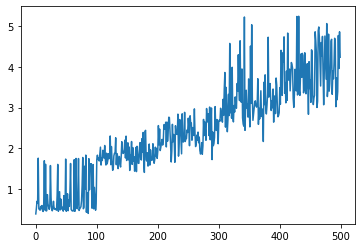

In [0]:
plt.plot(reward_hist)

In [0]:
model.save_weights(path+'rl_model_lstm_FINAL.h5')

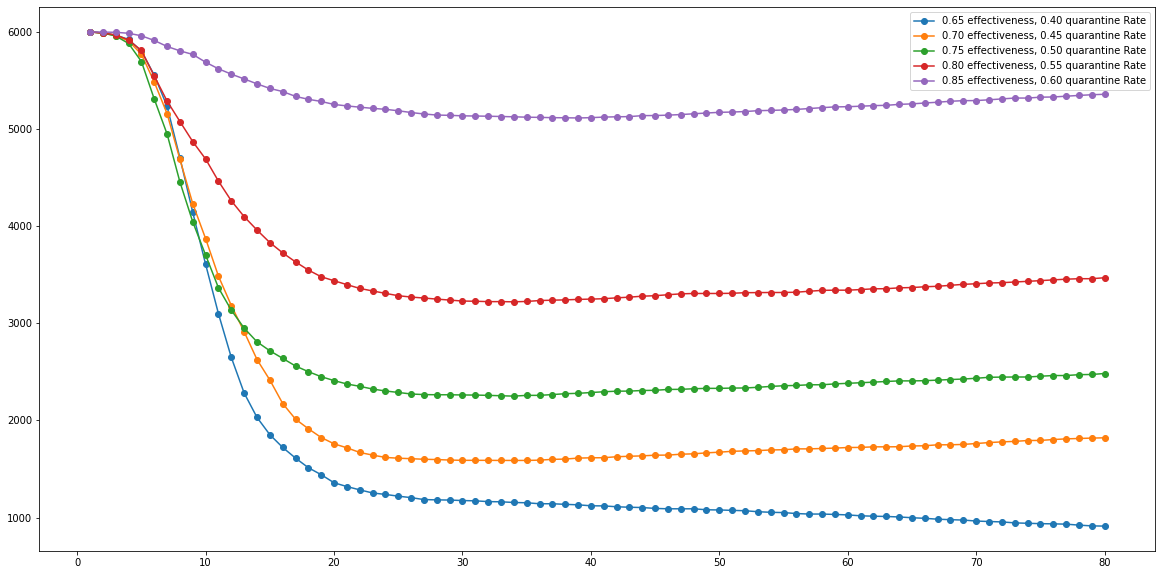

In [0]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1,81),plotting[0],'o-',np.arange(1,81),plotting[1],'o-',np.arange(1,81),plotting[2],'o-',np.arange(1,81),plotting[3],'o-',np.arange(1,81),plotting[4],'o-')
plt.legend(['0.65 effectiveness, 0.40 quarantine Rate','0.70 effectiveness, 0.45 quarantine Rate','0.75 effectiveness, 0.50 quarantine Rate','0.80 effectiveness, 0.55 quarantine Rate','0.85 effectiveness, 0.60 quarantine Rate'])

In [0]:
mod = tf.keras.Sequential([
                             tf.keras.layers.LSTM(1024,return_sequences=True, recurrent_initializer='glorot_uniform',recurrent_activation='sigmoid',stateful=True,batch_input_shape=[1,None,2] ),
                             tf.keras.layers.LSTM(512,return_sequences=True, recurrent_initializer='glorot_uniform',recurrent_activation='sigmoid',stateful=True ),
                             tf.keras.layers.LSTM(2,return_sequences=True, recurrent_initializer='glorot_uniform',recurrent_activation='sigmoid',stateful=True) 

])

In [0]:
mod.load_weights(path+'rl_model_lstm_FINAL.h5')

In [0]:
#model.save_weights(path+'rl_model_lstm1.h5')

In [0]:
# mod = tf.keras.Sequential([
#             tf.keras.layers.Dense(32,activation='relu'),
#             tf.keras.layers.Dense(2,activation=None)
# ])

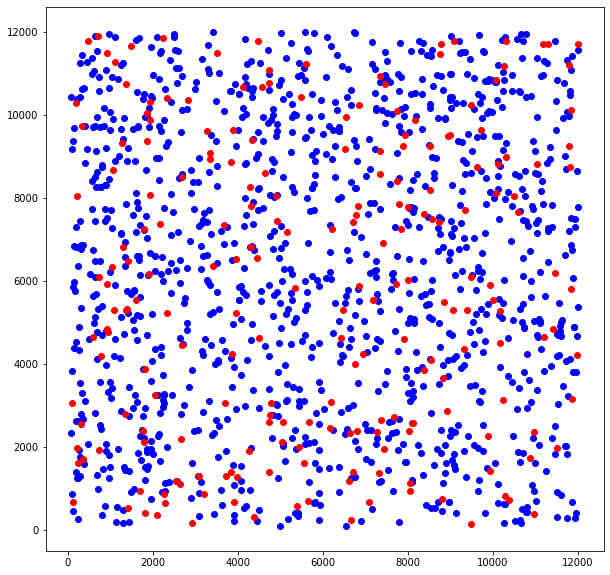

plot finished
plot finished


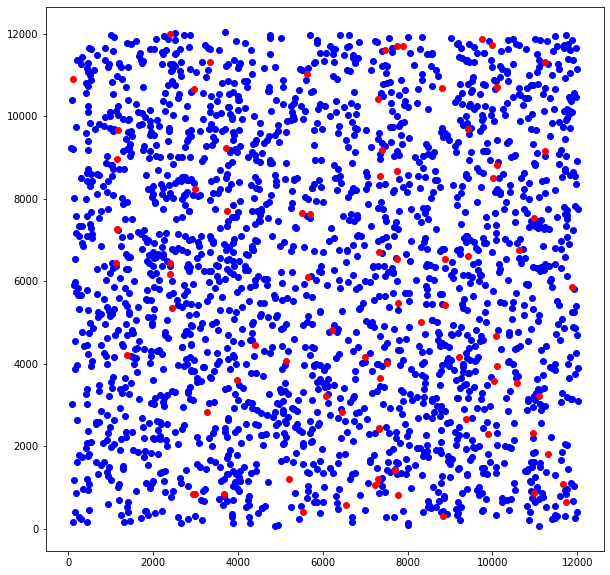

plot finished


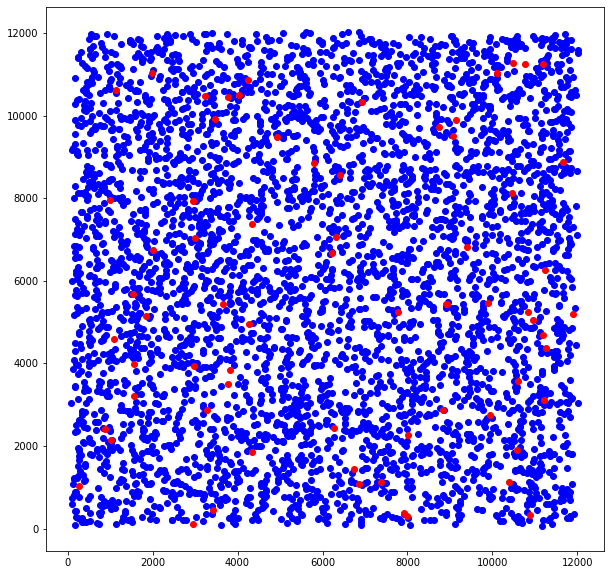

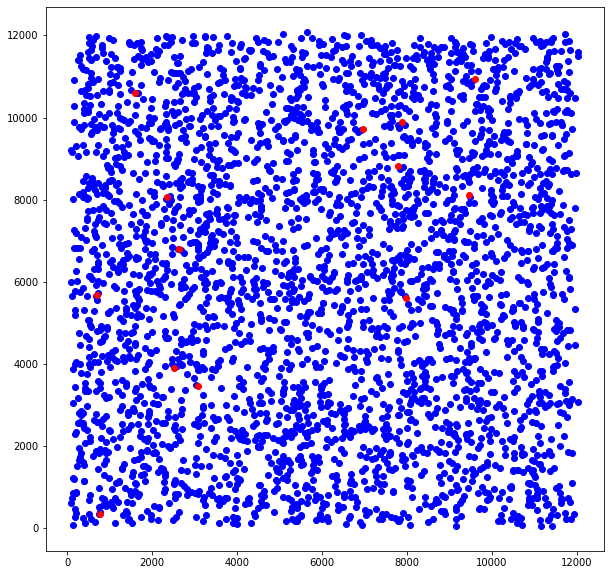

plot finished


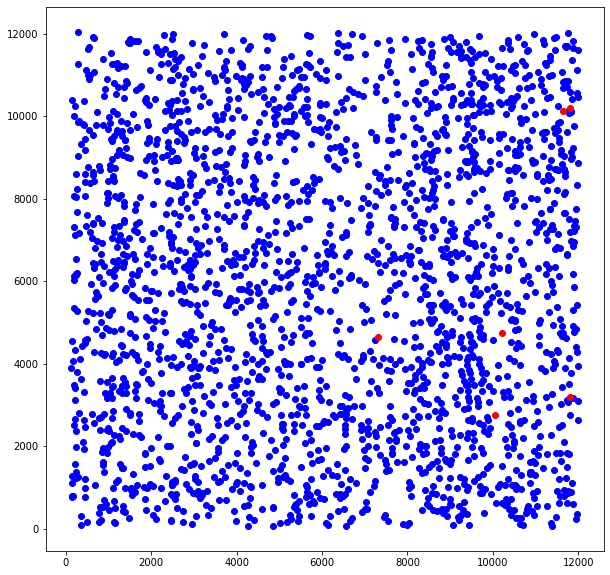

plot finished


In [0]:


parameters1 = [0.65,0.70,0.75,0.80,0.85]
parameters2 = [0.40,0.45,0.50,0.55,0.60]
# reward_hist = []
plotting = []
if hasattr(tqdm, '_instances'): tqdm._instances.clear()
for parameter in range(len(parameters1)): 
   effectiveness = parameters1[parameter]
   get_quarantined = parameters2[parameter]
   epidemic_model = epidemic(dates,effectiveness=effectiveness,get_quarantined=get_quarantined)
   #for episode in range(100):
   first_obs= epidemic_model.reset()
   gen = epidemic_model.simulate()
   memory.clear()
   while True:
       try:
         next(gen)
         action = choose_action(model,first_obs)
         next_obs, reward,done = gen.send(action)
         if(done==True and len(next_obs)>1):
           memory.actions = memory.actions + [action]
           counter = len(memory.actions)
           for i in range(80 -counter):
             memory.actions.append(0)
   
           for i in range(len(next_obs)):
             memory.observations.append(next_obs[i])
             memory.rewards.append(reward[i])
           
         else:
           memory.add_to_memory(first_obs,action,reward)
       except StopIteration:
          # reward_hist.append(sum(memory.rewards)/80)
          #plt.plot(np.arange(1,81),np.vstack(memory.observations)[:,0],'b-',np.arange(1,81),np.vstack(memory.observations)[:,1],'r-')
          #smoothed_reward.append(sum(memory.rewards))
          plotting.append(np.vstack(memory.observations)[:,0])   
          print('plot finished')
          break
       first_obs = next_obs
   
   #plt.plot(np.arange(1,81),np.vstack(memory.observations)[:,0],'b-')
   #plt.show()
       

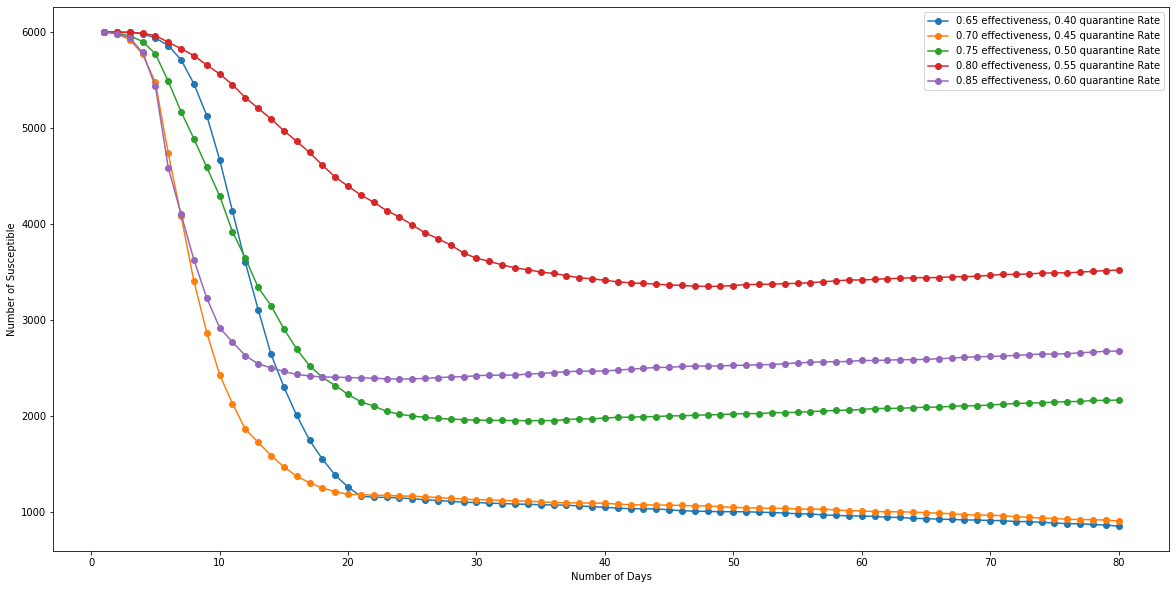

In [0]:
plt.figure(figsize=(20,10))
plt.xlabel('Number of Days')
plt.ylabel('Number of Susceptible')
plt.plot(np.arange(1,81),plotting[0],'o-',np.arange(1,81),plotting[1],'o-',np.arange(1,81),plotting[2],'o-',np.arange(1,81),plotting[3],'o-',np.arange(1,81),plotting[4],'o-')
plt.legend(['0.65 effectiveness, 0.40 quarantine Rate','0.70 effectiveness, 0.45 quarantine Rate','0.75 effectiveness, 0.50 quarantine Rate','0.80 effectiveness, 0.55 quarantine Rate','0.85 effectiveness, 0.60 quarantine Rate'])